notebook to plot boundary conditions from `NT_BC` and compare to Geant simulations

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:.5e}')

In [7]:
XS_data_dir = '../cross_sections/data/V1/'
Src_data_dir = '../sources/data/V1/'
BC_data_dir = 'data/V1/'

In [8]:
def plottable(X, Y):
    return (X[1:] + X[:-1])/2, Y[1:]

def plottable_spectrum(X, Y):
    return (X[1:] + X[:-1])/2, Y[1:]/abs(X[1:] - X[:-1])

def trap(x,y):
    return ((y[:-1] + y[1:])*(x[1:] - x[:-1])).sum()/2

def trap_plottable(X, Y):
    return Y.sum()

def trap_plottable_old(X, Y):
    x, y = plottable_spectrum(X,Y)
    return trap(x[::-1], y[::-1])

In [9]:
# energy bounds (eV)
EG = 0.1 
E0 = 2e7

matlist = ('G4_Si', 'G4_Pb', 'Norite', 'G4_POLYETHYLENE', 'BoratedPoly', 'G4_Cu')

def mat_str_add(mat):
    if mat == 'Norite':
        return ''
    elif mat == 'G4_POLYETHYLENE':
        return '_poly'
    elif mat == 'BoratedPoly':
        return '_borpoly'
    else:
        return mat[2:]

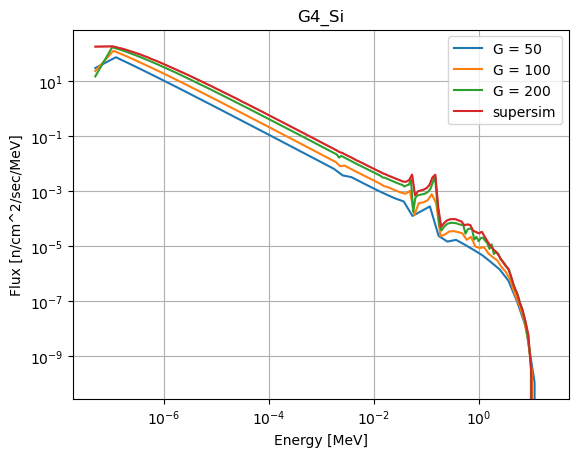

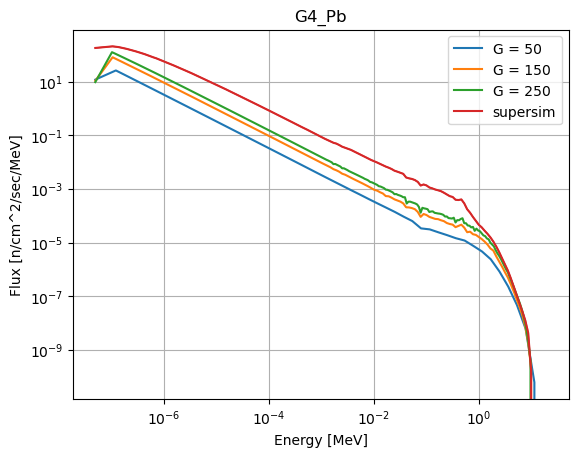

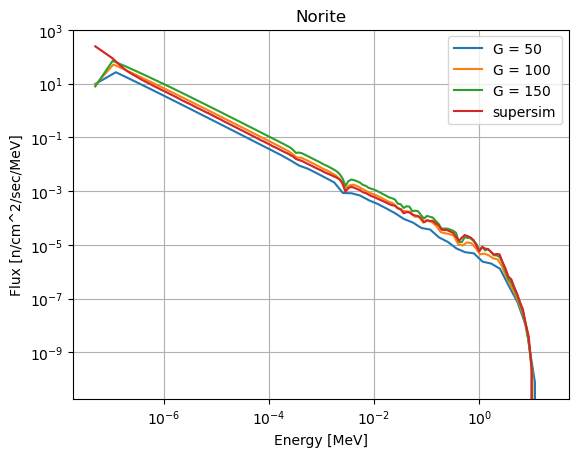

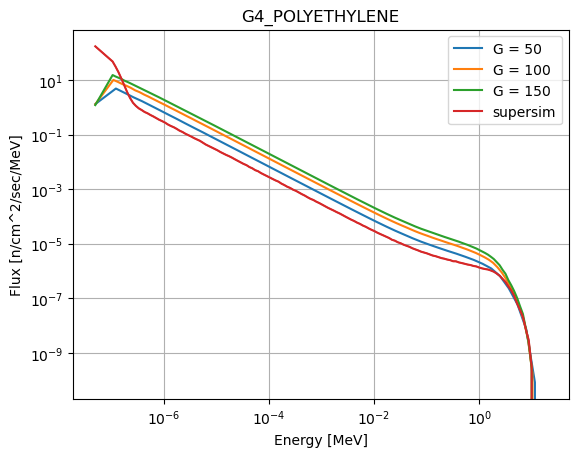

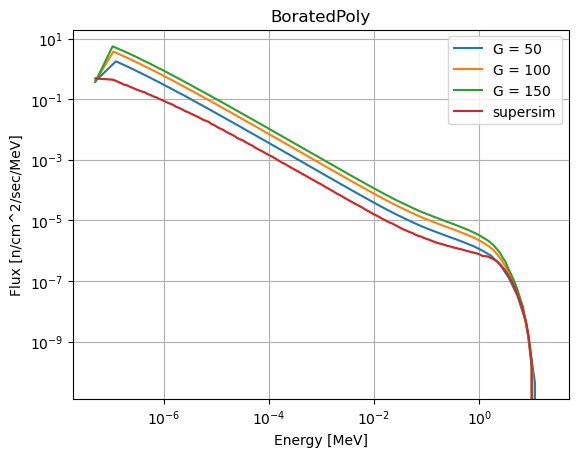

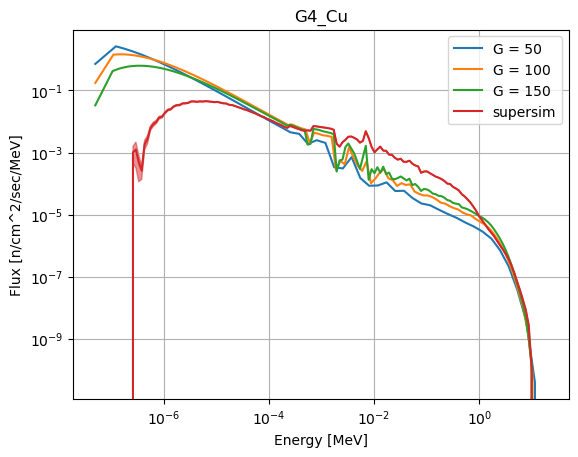

In [10]:
Gs = {'Norite': (50, 100, 150),
      'G4_Si': (50, 100, 200),
      'G4_Pb': (50, 150, 250),
      'G4_POLYETHYLENE': (50, 100, 150),
      'BoratedPoly': (50, 100, 150),
      'G4_Cu': (50, 100, 150)}

for mat in matlist:

    ss_data_file = 'data/SuperSim_estimates/phi_calcs' + mat_str_add(mat) + '_150.dat'
    ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig', 'dphig'])

    gs_s = ss_dat.index

    plt.figure()
    plt.loglog()
    plt.grid()
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Flux [n/cm^2/sec/MeV]')
    plt.title(mat)

    for G in Gs[mat]:
        #G += 100*(mat=='G4_Si')
        data_file = BC_data_dir + f'data_{mat}_{G}_BC_V1.dat'
        dat = pd.read_csv(data_file, sep = ' ', index_col = 0, names = ['Eg','phig'])

        Eg = dat.Eg.values
        phig = dat.phig.values
        gs = dat.index

        plt.plot(*plottable_spectrum(Eg, phig), label = f'G = {G}')

    Eg_s, phig_s = plottable_spectrum(ss_dat.Eg.values, ss_dat.phig.values)
    _, dphig_s = plottable_spectrum(ss_dat.Eg.values, ss_dat.dphig.values)
    ss_plot = plt.plot(Eg_s, phig_s, label = 'supersim')
    plt.fill_between(Eg_s, phig_s - dphig_s, phig_s + dphig_s, alpha =  0.5, color = ss_plot[0].get_color())
    #plt.plot(Eg[:-1], (1e-11)/Eg[:-1], label = '1/E')

    plt.legend()

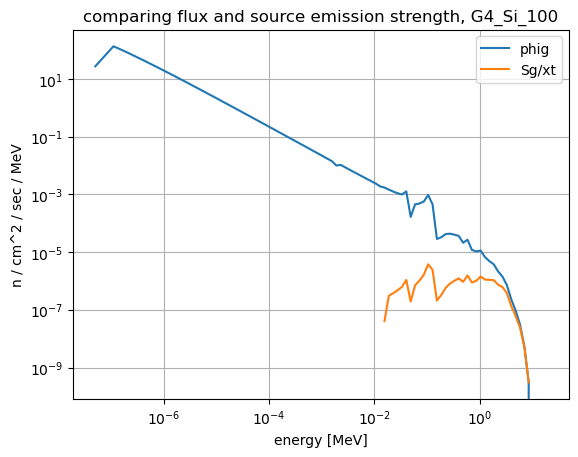

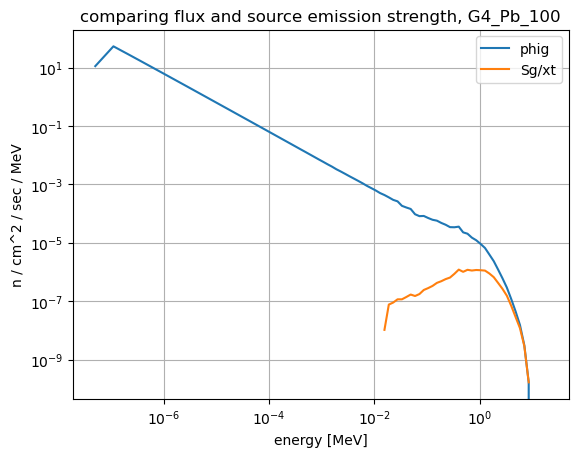

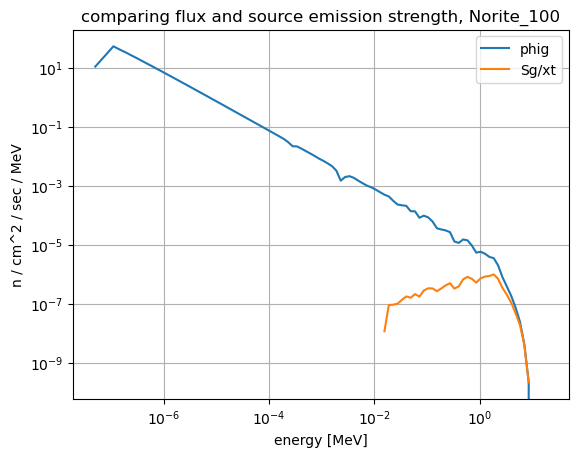

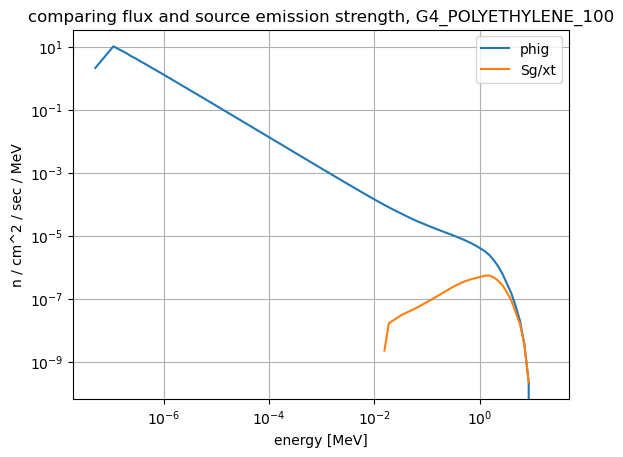

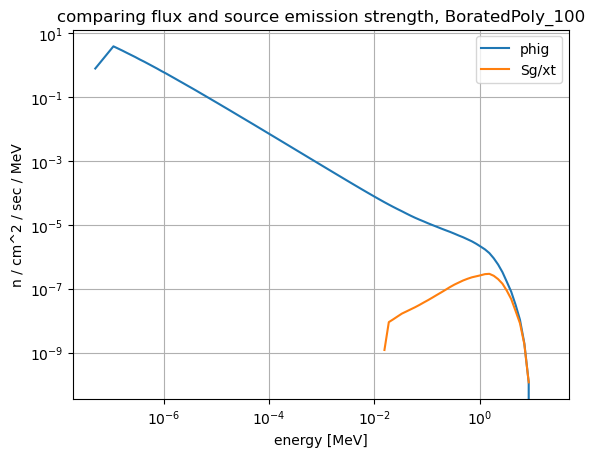

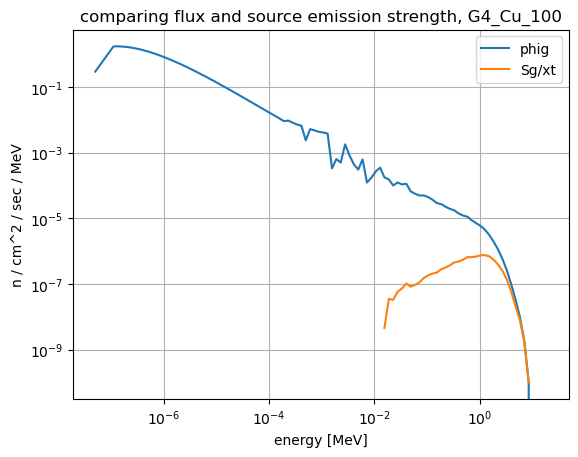

In [11]:
# compare flux and emission strength (group source/group total cross section)
G = 100
for mat in matlist:

    XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'xt'])
    Src = pd.read_csv(Src_data_dir + f'data_{mat}_{G}_Sg.dat', sep = ' ', index_col = 0, names = ['Eg','Sg'])
    BC = pd.read_csv(BC_data_dir + f'data_{mat}_{G}_BC_V1.dat', sep = ' ', index_col = 0, names = ['Eg','phig'])

    Eg = BC.Eg.values
    Es = (Eg[1:] + Eg[:-1])/2
    dE = abs(Eg[1:] - Eg[:-1])

    phig = BC.phig.values[:-1]/dE
    Sg = Src.Sg.values[:-1]/dE
    xt = XS.xt.values[:-1]
    xs = XS.x_s.values[:-1]

    p2 = Sg!=0

    plt.figure()
    plt.loglog()
    plt.grid()
    plt.xlabel('energy [MeV]')
    plt.ylabel('n / cm^2 / sec / MeV')
    plt.title(f'comparing flux and source emission strength, {mat}_{G}')

    plt.plot(Es, phig, label = 'phig')
    plt.plot(Es[p2], Sg[p2]/xt[p2], label = 'Sg/xt')


    plt.legend()

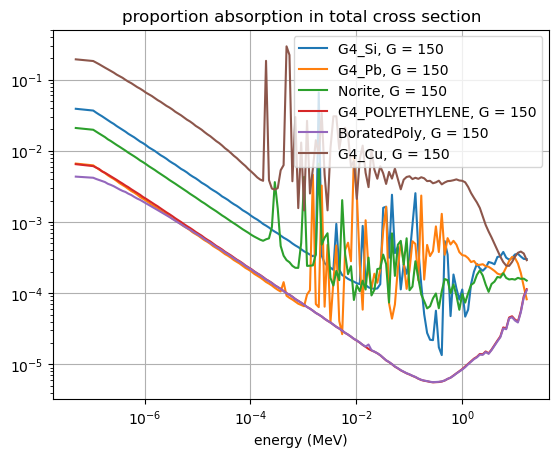

In [12]:
plt.figure()
plt.title('proportion absorption in total cross section')
plt.loglog()
plt.grid()
plt.xlabel('energy (MeV)')

G = 150

for mat in matlist:
    XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'xt'])

    Eg = XS.Eg.values
    Es = (Eg[1:] + Eg[:-1])/2
    xt = XS.xt.values[:-1]
    xs = XS.x_s.values[:-1]

    plt.plot(Es[xt!=0], (xt-xs)[xt!=0]/xt[xt!=0], label = f'{mat}, G = {G}')

plt.legend()

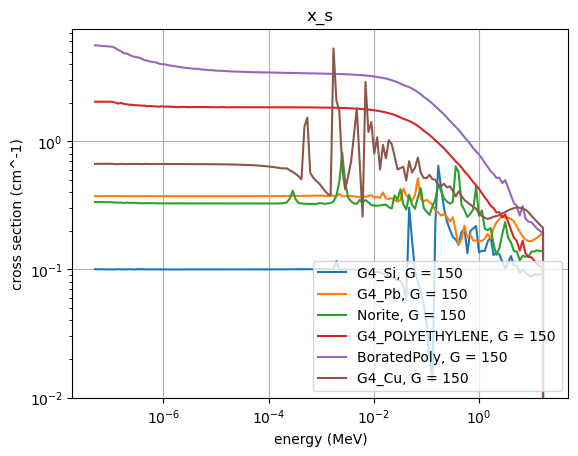

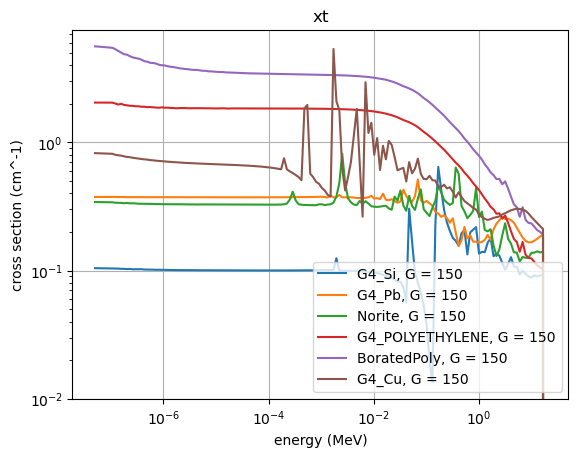

In [13]:
for x in ['x_s', 'xt']:

    plt.figure()
    plt.title(x)
    plt.loglog()
    plt.grid()
    plt.xlabel('energy (MeV)')
    plt.ylabel('cross section (cm^-1)')

    G = 150

    for mat in matlist:
        XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'xt'])

        Eg = XS.Eg.values
        Es = (Eg[1:] + Eg[:-1])/2
        xx = XS[x].values[:-1]

        plt.plot(Es, xx, label = f'{mat}, G = {G}')

    plt.legend()

Text(0.5, 1.0, 'Relative uncertainty in Supersim flux')

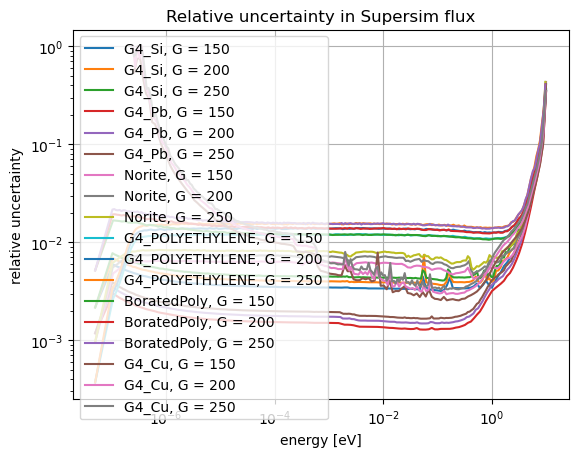

In [14]:
plt.figure()
plt.loglog()
plt.grid()

for mat in matlist:

    for G in (150, 200, 250):

        ss_data_file = 'data/SuperSim_estimates/phi_calcs' + mat_str_add(mat) + f'_{G}.dat'
        ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig', 'dphig'])
        Eg_s, phig_s = plottable_spectrum(ss_dat.Eg.values, ss_dat.phig.values)
        _, dphig_s = plottable_spectrum(ss_dat.Eg.values, ss_dat.dphig.values)
        
        p = dphig_s > 0
        plt.plot(Eg_s[p], dphig_s[p]/phig_s[p], label = f'{mat}, G = {G}')

plt.legend()
plt.xlabel('energy [eV]')
plt.ylabel('relative uncertainty')
plt.title('Relative uncertainty in Supersim flux')

In [15]:
A_vals = {'G4_Si': 28,
          'Norite': 20.86,
          'G4_Pb': 207,
          'G4_POLYETHYLENE': 4.67553333,
          'BoratedPoly': 5.120336788,
          'G4_Cu': 63.546}

def calc_bc(xs, xt, Sg):
    phi = np.zeros(xs.shape)
    for g in range(1, len(phi)):
        phi[g] = (xs[g-1]*phi[g-1] + Sg[g])/xt[g]
    return phi


def get_q(a, b):

    if b < a:
        num = -np.log(a) + (1-a)*(np.log(a/b) - 1)
        denom = 1 - a + a*np.log(a)
    else:
        num = b - np.log(b) - 1
        if a < b**2:
            denom = (1-b)**2
        else:
            denom = 1 + a - 2*b - a*np.log(a/b**2)
    
    return num/(num+denom)

0.032930631879620566
0.011845536736001345
0.008017385640448993
0.006123100397022203
0.004922870338871166
0.031371633449525455
0.011869666296930002
0.009739159208915119
0.00912794788195073
0.009054023890683978
0.03374191342740796
0.012798976786993106
0.009653408971201292
0.008418411663408171
0.007581785174135885
0.036679036112448035
0.013007195171897896
0.00957591419072664
0.008245698936945786
0.007689577156304601


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.0374664889310367
0.012363827385704901
0.008184365134099657
0.006862743541605415
0.006178928587809191
0.03686468493037949
0.009554073861058004
0.004184897176892278
0.0023253837222347554
0.0014720344767985396


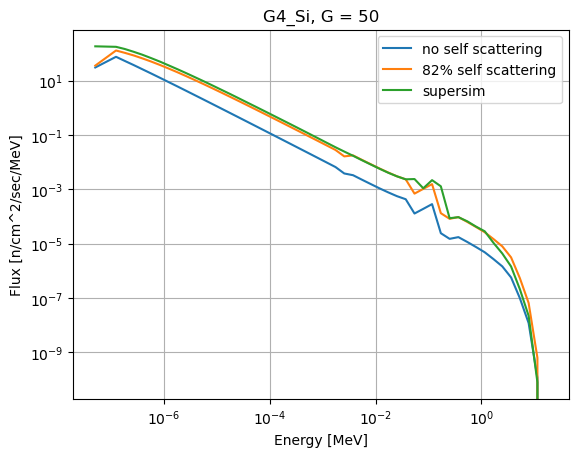

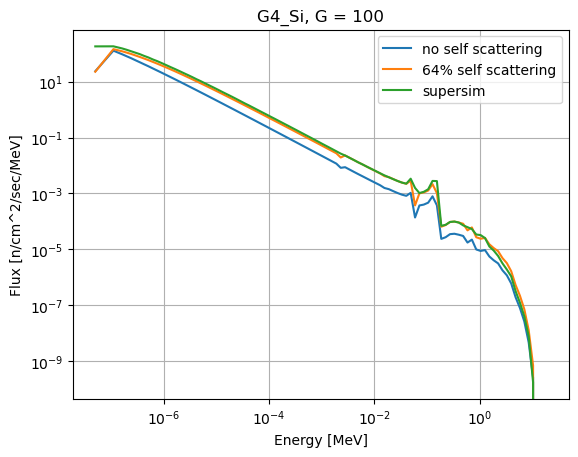

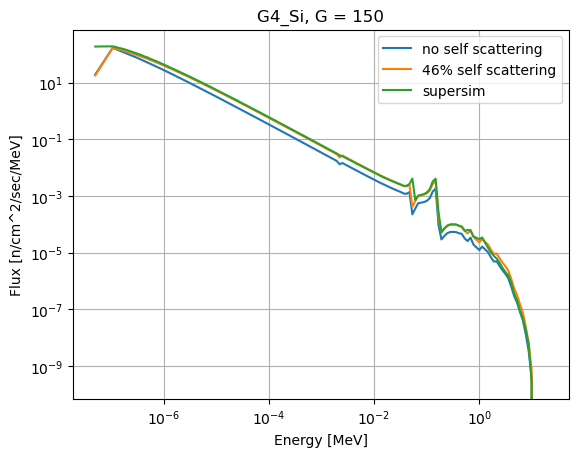

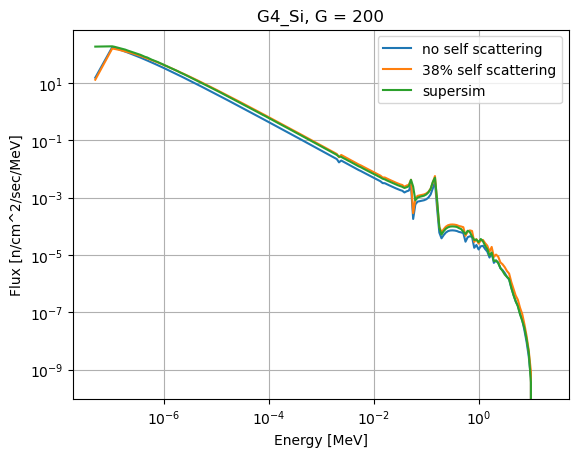

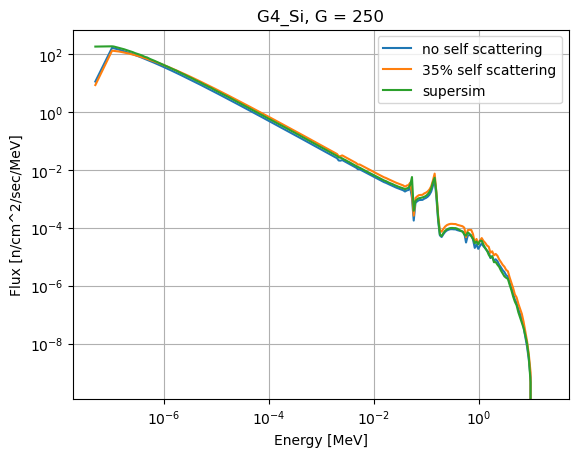

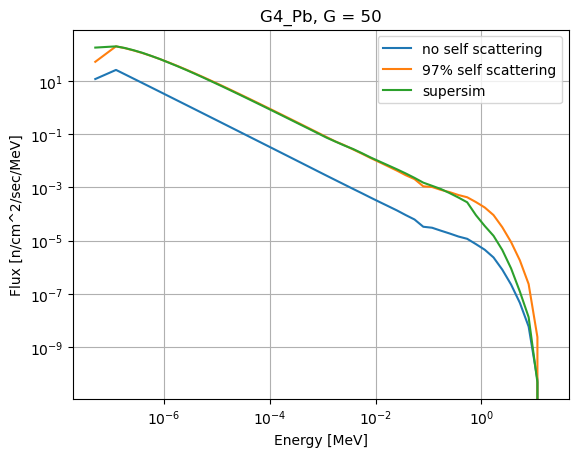

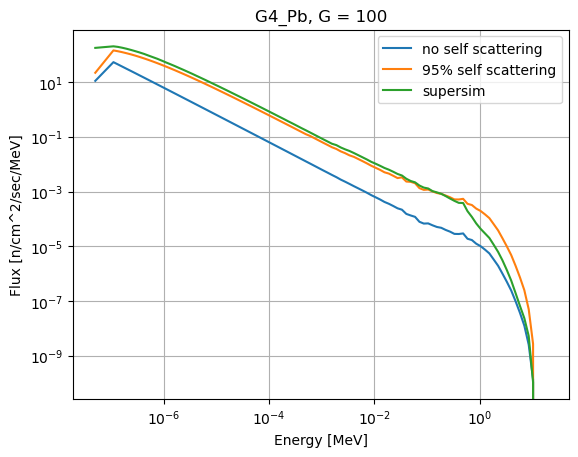

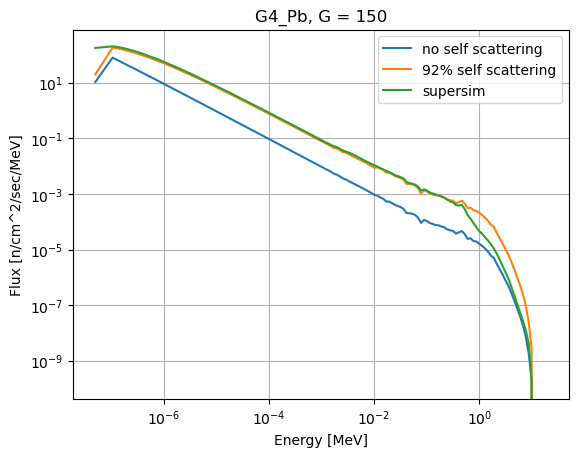

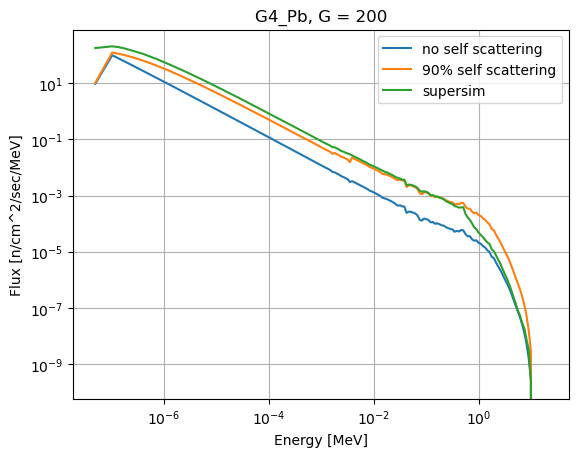

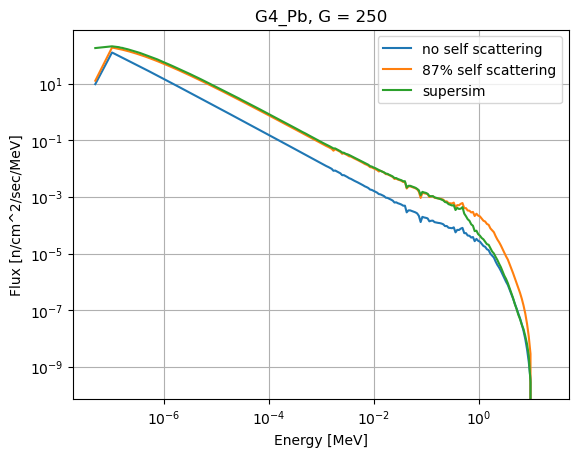

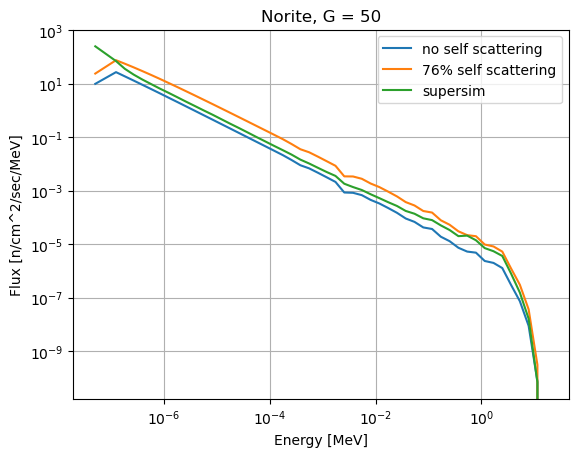

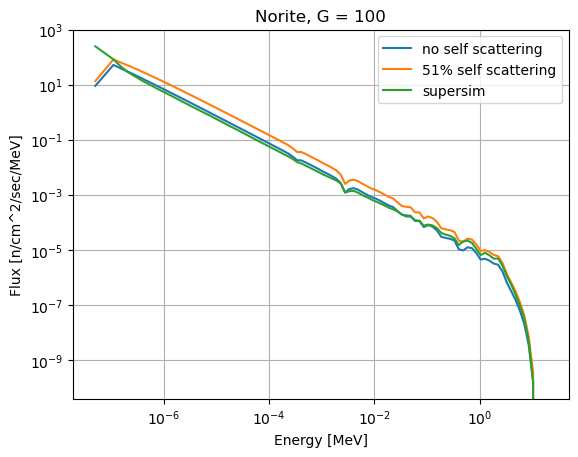

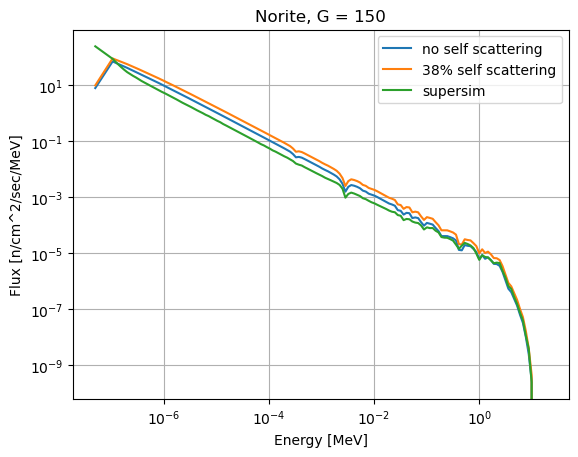

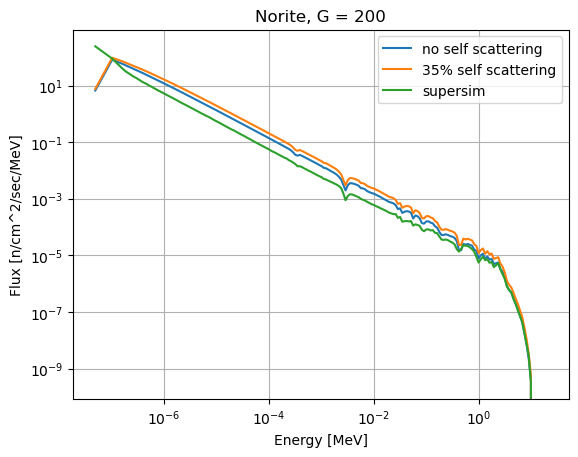

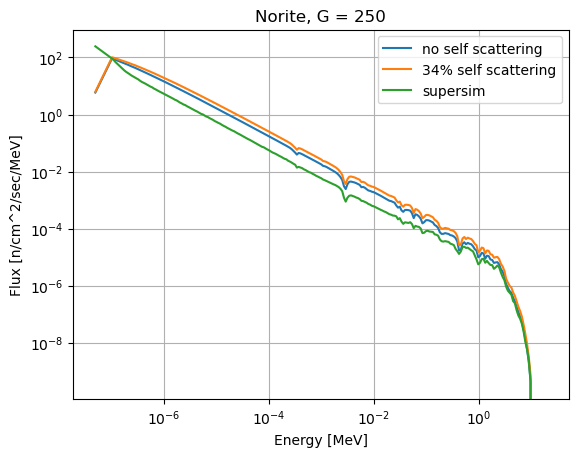

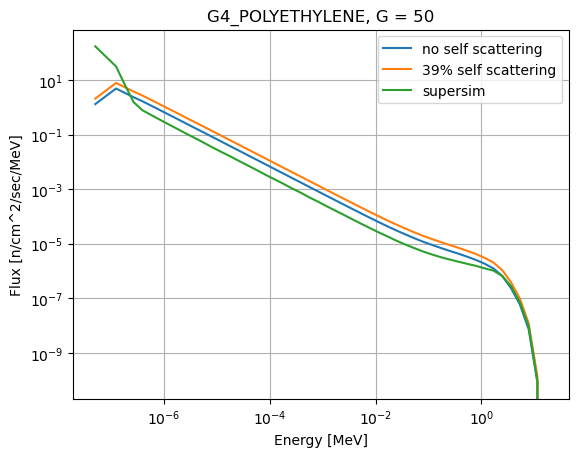

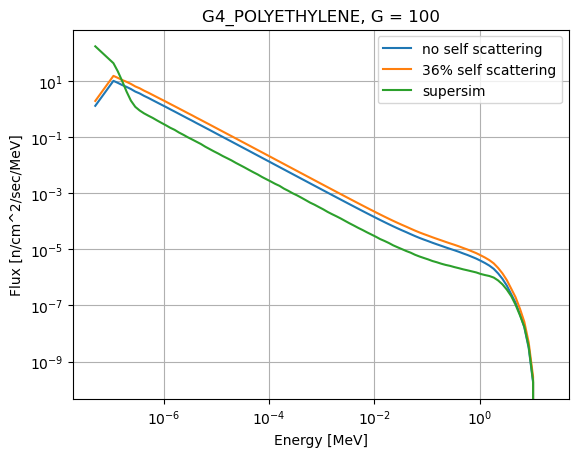

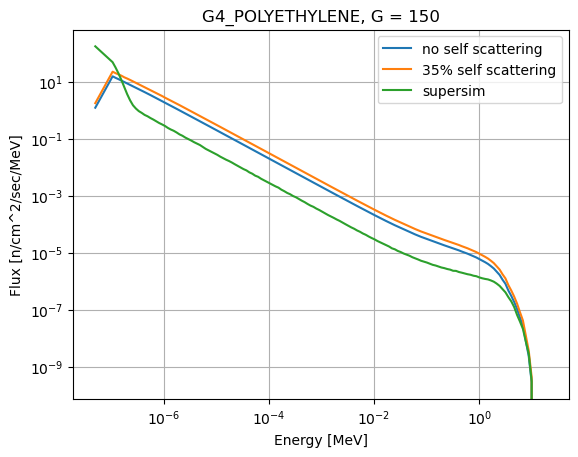

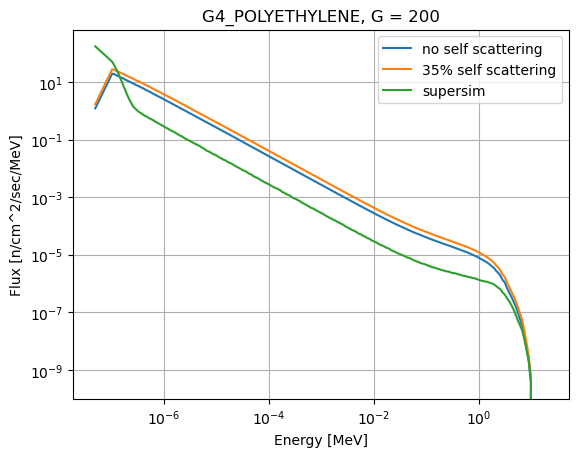

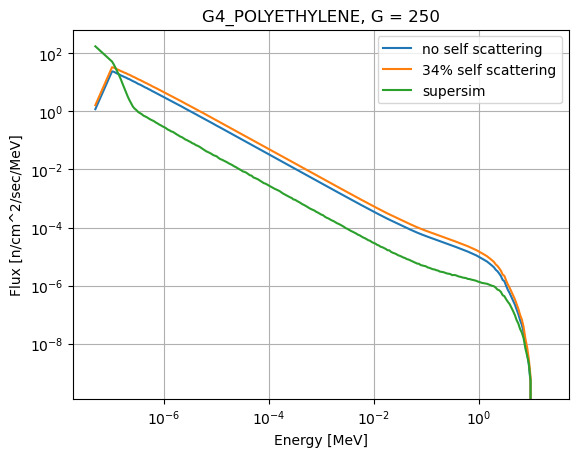

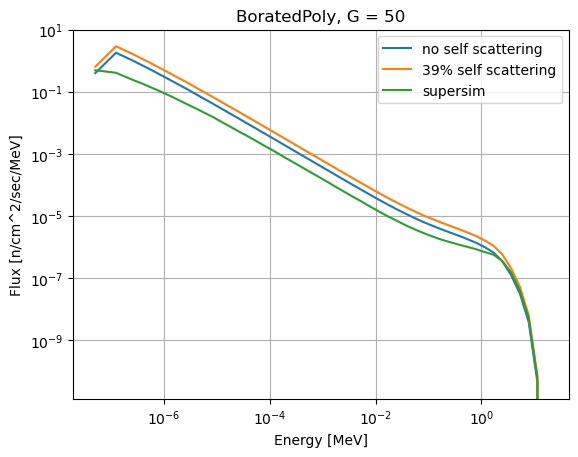

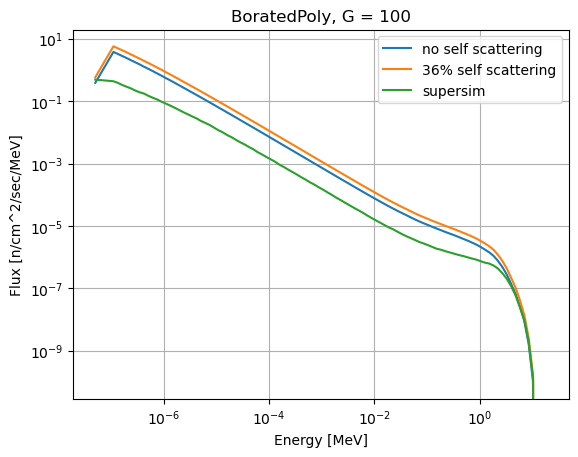

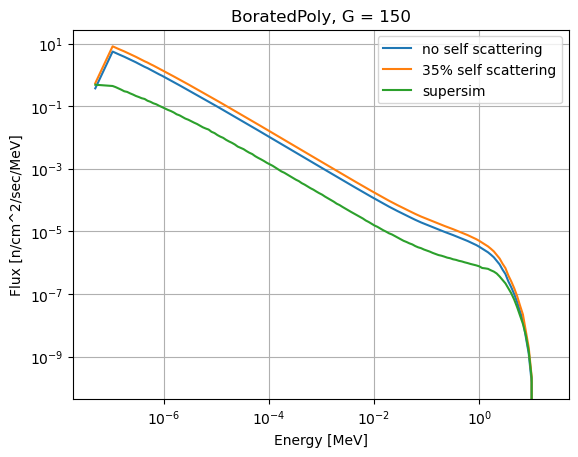

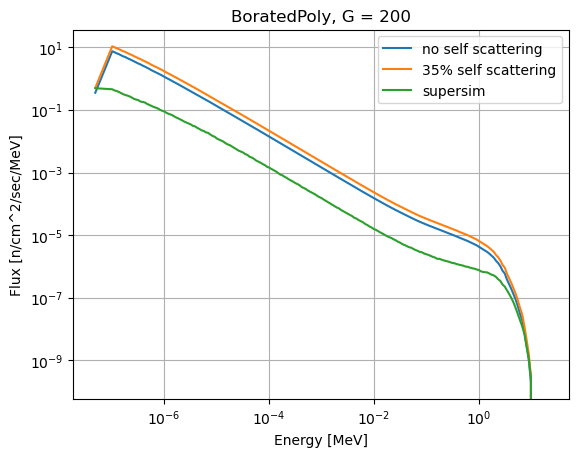

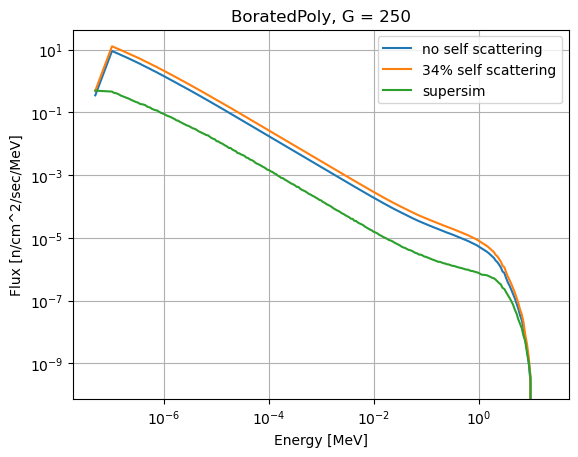

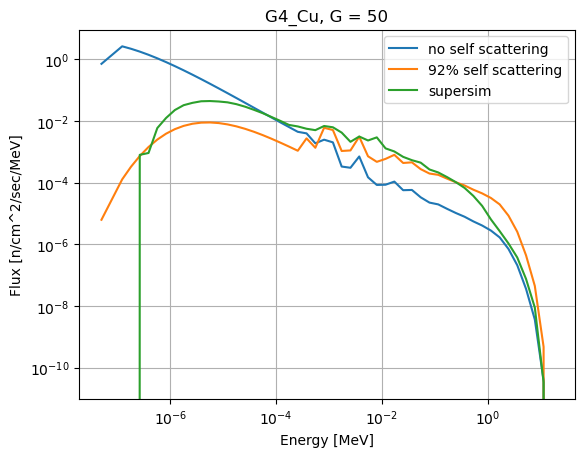

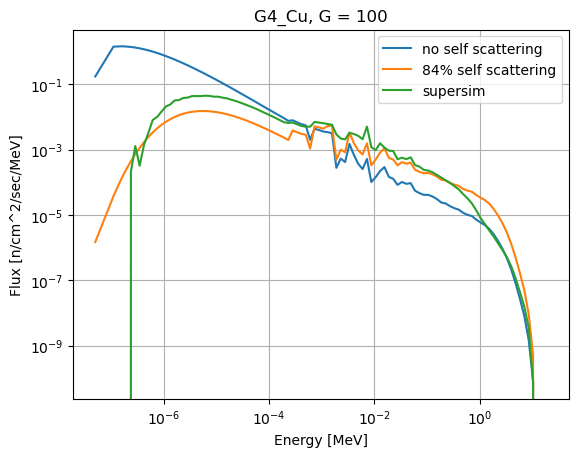

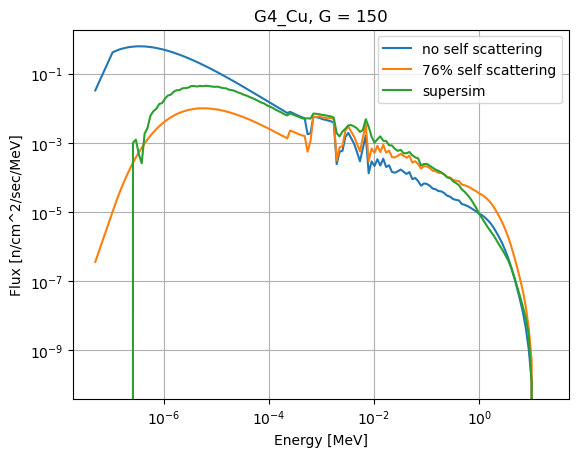

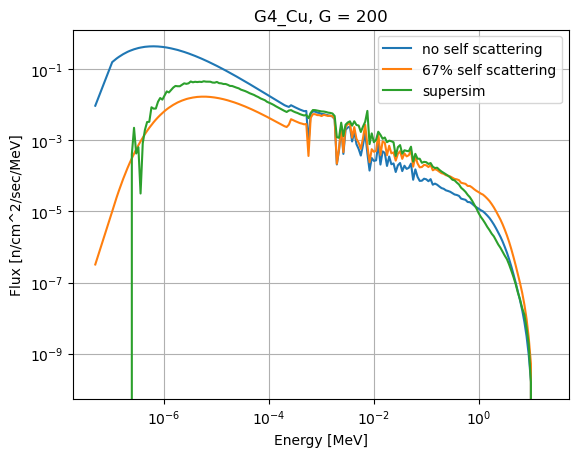

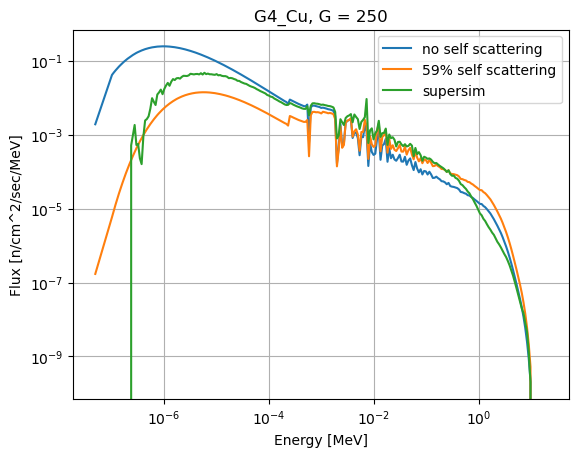

In [16]:
Gs= {'Norite': (50, 100, 150, 200, 250),
     'G4_Si': (50, 100, 150, 200, 250),
     'G4_Pb': (50, 100, 150, 200, 250),
     'G4_POLYETHYLENE': (50, 100, 150, 200, 250),
     'BoratedPoly': (50, 100, 150, 200, 250),
     'G4_Cu': (50, 100, 150, 200, 250)}

total_fluxes = pd.DataFrame([(key, entry) for key in Gs for entry in Gs[key]], columns = ('mat','G'))

for mat in matlist:

    A = A_vals[mat]
    alpha = ((A-1)/(A+1))**2
    
    for G in Gs[mat]:

        beta = (EG/E0)**(1/G)

        q = get_q(alpha, beta)
        
        XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'x_t'])
        Src = pd.read_csv(Src_data_dir + f'data_{mat}_{G}_Sg.dat', sep = ' ', index_col = 0, names = ['Eg','Sg'])
        BC = pd.read_csv(BC_data_dir + f'data_{mat}_{G}_BC_V1.dat', sep = ' ', index_col = 0, names = ['Eg','phig'])

        Eg = BC.Eg.values
        Es = (Eg[1:] + Eg[:-1])/2
        dE = abs(Eg[1:] - Eg[:-1])

        xs = XS.x_s.values
        xt = XS.x_t.values
        Sg = Src.Sg.values
        Eg = XS.Eg.values
        phig = BC.phig.values


        plt.figure()
        plt.grid()
        plt.loglog()
        plt.xlabel('Energy [MeV]')
        plt.ylabel('Flux [n/cm^2/sec/MeV]')
        plt.title(f'{mat}, G = {G}')

        phi2 = calc_bc((1-q)*xs, xt - q*xs, Sg)

        

        ss_data_file = 'data/SuperSim_estimates/phi_calcs' + mat_str_add(mat) + f'_{G}.dat'
        ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig', 'dphig'])
        Eg_s = ss_dat.Eg.values
        phig_s = ss_dat.phig.values

        plt.plot(*plottable_spectrum(Eg, phig), label = 'no self scattering')
        plt.plot(*plottable_spectrum(Eg, phi2), label = f'{100*q:.0f}% self scattering')
        plt.plot(*plottable_spectrum(Eg_s, phig_s), label = 'supersim')

        plt.legend()

        i = (total_fluxes['mat'] == mat) & (total_fluxes['G'] == G)
        total_fluxes.at[i, 'no_ss'] = trap_plottable(Eg, phig)
        total_fluxes.at[i, 'w_ss'] = trap_plottable(Eg, phi2)
        total_fluxes.at[i, 'supersim'] = trap_plottable(Eg_s, phig_s)
        total_fluxes.at[i, 'supersim_uncertainty'] = trap_plottable(Eg_s, ss_dat.dphig.values)

        f1 = trap_plottable(Eg, phig)
        f2 = trap_plottable_old(Eg, phig)
        print((f2 - f1)/f1)
        plt.savefig(f'../../CDMS/NTresults/newtherm_slowingdown/{mat}_{G}_ss_comp.png')

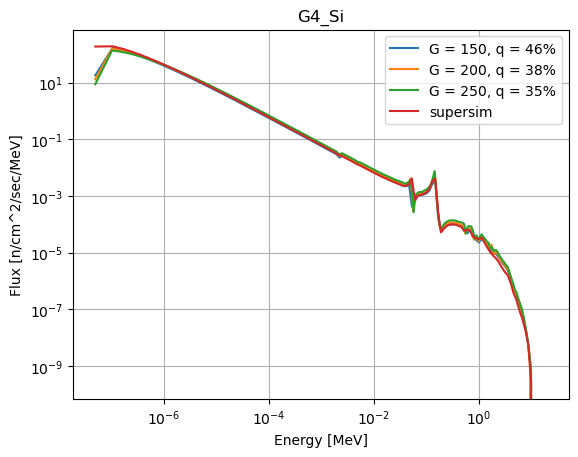

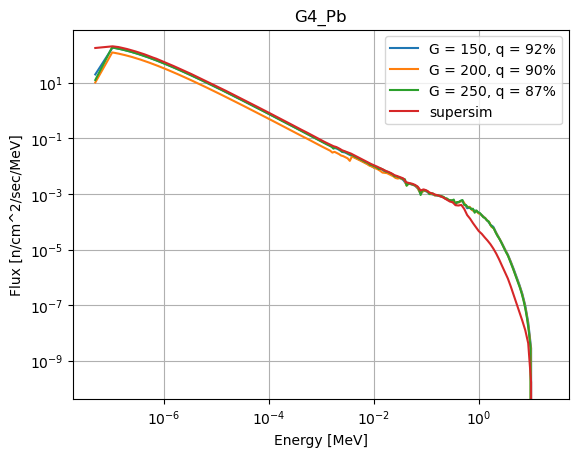

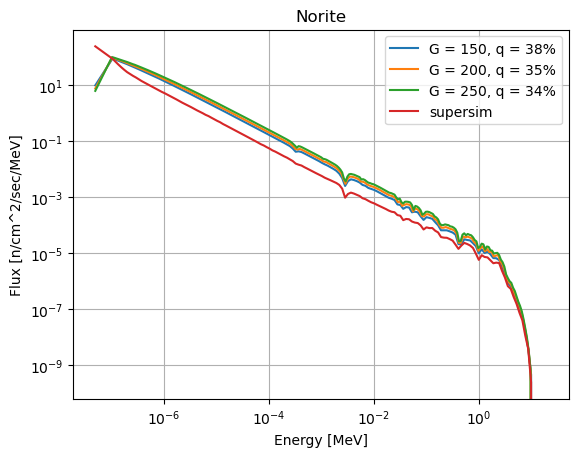

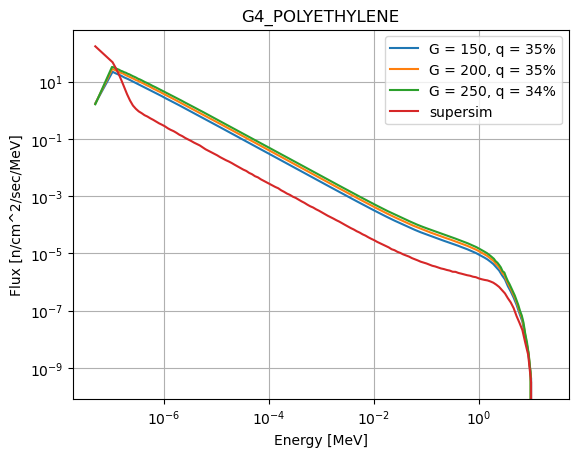

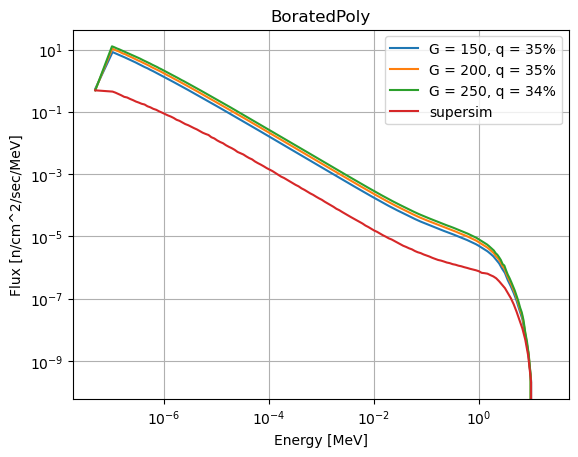

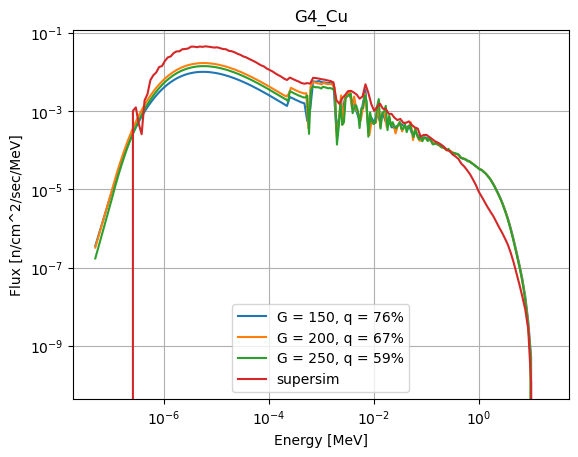

In [17]:
# plot self-scattering corrected terms

for mat in matlist:

    A = A_vals[mat]
    alpha = ((A-1)/(A+1))**2

    ss_data_file = 'data/SuperSim_estimates/phi_calcs' + mat_str_add(mat) + '_150.dat'
    ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig', 'dphig'])

    plt.figure()
    plt.loglog()
    plt.grid()
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Flux [n/cm^2/sec/MeV]')
    plt.title(mat)

    for G in [150, 200, 250]:        

        XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'x_t'])
        Src = pd.read_csv(Src_data_dir + f'data_{mat}_{G}_Sg.dat', sep = ' ', index_col = 0, names = ['Eg','Sg'])
        BC = pd.read_csv(BC_data_dir + f'data_{mat}_{G}_BC_V1.dat', sep = ' ', index_col = 0, names = ['Eg','phig'])

        Eg = BC.Eg.values
        Es = (Eg[1:] + Eg[:-1])/2
        dE = abs(Eg[1:] - Eg[:-1])

        xs = XS.x_s.values
        xt = XS.x_t.values
        Sg = Src.Sg.values
        Eg = XS.Eg.values
        phig = BC.phig.values

        beta = (EG/E0)**(1/G)

        q = get_q(alpha, beta)
        
        phi2 = calc_bc((1-q)*xs, xt - q*xs, Sg)

        plt.plot(*plottable_spectrum(Eg, phi2), label = f'G = {G}, q = {100*q:.0f}%')

    Eg_s, phig_s = plottable_spectrum(ss_dat.Eg.values, ss_dat.phig.values)
    ss_plot = plt.plot(Eg_s, phig_s, label = 'supersim')
    #plt.fill_between(Eg_s, phig_s - dphig_s, phig_s + dphig_s, alpha =  0.5, color = ss_plot[0].get_color())
    #plt.plot(Eg[:-1], (1e-11)/Eg[:-1], label = '1/E')

    plt.legend()

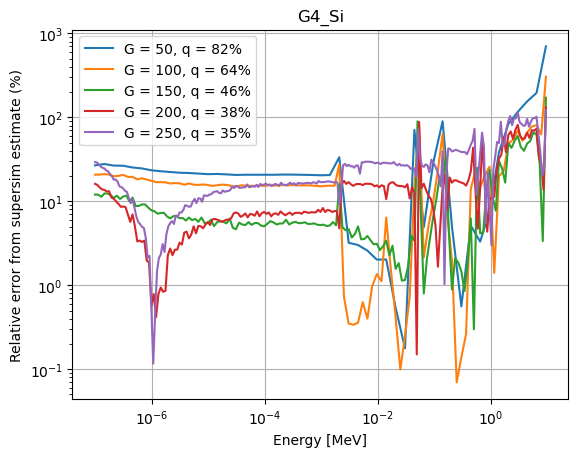

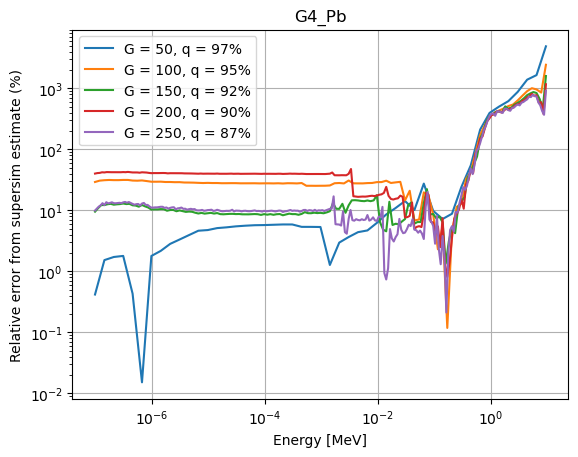

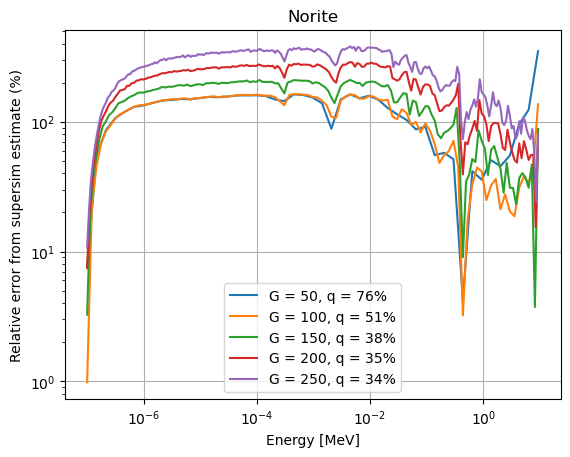

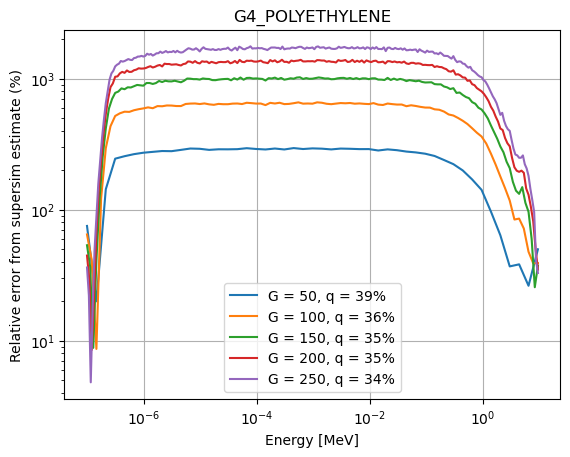

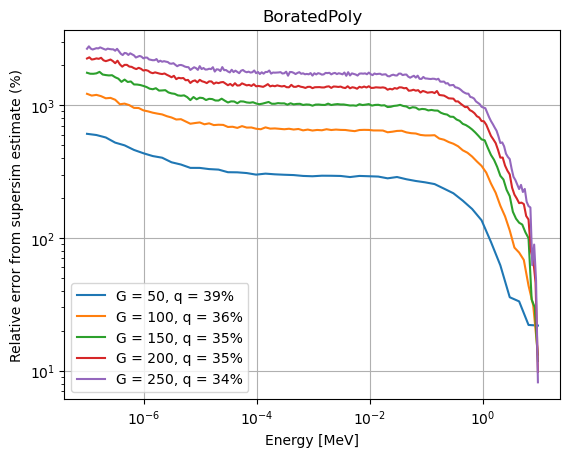

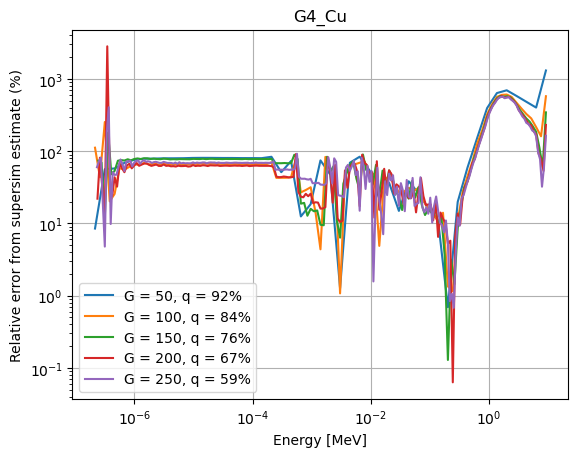

In [18]:
# plot self-scattering corrected terms

for mat in matlist:

    A = A_vals[mat]
    alpha = ((A-1)/(A+1))**2

    plt.figure()
    plt.loglog()
    plt.grid()
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Relative error from supersim estimate (%)')
    plt.title(mat)
    

    for G in [50, 100, 150, 200, 250]:

        ss_data_file = 'data/SuperSim_estimates/phi_calcs' + mat_str_add(mat) + f'_{G}.dat'
        ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig', 'dphig'])

        Eg_s = ss_dat.Eg.values
        phig_s = ss_dat.phig.values
        dphig_s = ss_dat.dphig.values
        #ss_plot = plt.plot(Eg_s, phig_s, label = 'supersim')

        p = (phig_s[:-1] > 0)

        XS = pd.read_csv(XS_data_dir + f'data_{mat}_{G}_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'x_t'])
        Src = pd.read_csv(Src_data_dir + f'data_{mat}_{G}_Sg.dat', sep = ' ', index_col = 0, names = ['Eg','Sg'])
        BC = pd.read_csv(BC_data_dir + f'data_{mat}_{G}_BC_V1.dat', sep = ' ', index_col = 0, names = ['Eg','phig'])

        Eg = BC.Eg.values
        Es = (Eg[1:] + Eg[:-1])/2
        dE = abs(Eg[1:] - Eg[:-1])

        xs = XS.x_s.values
        xt = XS.x_t.values
        Sg = Src.Sg.values
        Eg = XS.Eg.values
        phig = BC.phig.values

        beta = (EG/E0)**(1/G)

        q = get_q(alpha, beta)
        
        phi2 = calc_bc((1-q)*xs, xt - q*xs, Sg)

        #plt.plot(Eg[p], abs(phig - phig_s)[p]/phig_s[p], label = f'G = {G}, q = {100*q:.0f}%')
        plt.plot(Eg[:-1][p], 100*abs(phi2 - phig_s)[:-1][p]/phig_s[:-1][p], label = f'G = {G}, q = {100*q:.0f}%')

    plt.legend()

In [19]:
total_fluxes['err'] = (total_fluxes['w_ss'] - total_fluxes['supersim'])/total_fluxes['supersim']
total_fluxes

,mat,G,no_ss,w_ss,supersim,supersim_uncertainty,err
0,Norite,50,6.18410e-05,2.37805e-04,1.38211e-04,4.21202e-07,7.20588e-01
1,Norite,100,1.19807e-04,2.36446e-04,1.38211e-04,5.85130e-07,7.10759e-01
2,Norite,150,1.76214e-04,2.74885e-04,1.38211e-04,7.11041e-07,9.88873e-01
3,Norite,200,2.28334e-04,3.36033e-04,1.38211e-04,8.16907e-07,1.43130e+00
4,Norite,250,2.80474e-04,4.08513e-04,1.38211e-04,9.10682e-07,1.95572e+00
5,G4_Si,50,1.89006e-04,8.10687e-04,1.07372e-03,2.41308e-06,-2.44974e-01
6,G4_Si,100,3.75865e-04,8.83413e-04,1.07372e-03,3.26991e-06,-1.77241e-01
7,G4_Si,150,5.71000e-04,9.74987e-04,1.07372e-03,3.90512e-06,-9.19541e-02
8,G4_Si,200,7.54248e-04,1.12540e-03,1.07372e-03,4.50478e-06,4.81319e-02
9,G4_Si,250,8.81527e-04,1.23237e-03,1.07372e-03,4.99168e-06,1.47756e-01


In [20]:
print(total_fluxes[['mat', 'G', 'w_ss', 'supersim', 'err']].to_string(index = False))

            mat   G        w_ss    supersim          err
         Norite  50 2.37805e-04 1.38211e-04  7.20588e-01
         Norite 100 2.36446e-04 1.38211e-04  7.10759e-01
         Norite 150 2.74885e-04 1.38211e-04  9.88873e-01
         Norite 200 3.36033e-04 1.38211e-04  1.43130e+00
         Norite 250 4.08513e-04 1.38211e-04  1.95572e+00
          G4_Si  50 8.10687e-04 1.07372e-03 -2.44974e-01
          G4_Si 100 8.83413e-04 1.07372e-03 -1.77241e-01
          G4_Si 150 9.74987e-04 1.07372e-03 -9.19541e-02
          G4_Si 200 1.12540e-03 1.07372e-03  4.81319e-02
          G4_Si 250 1.23237e-03 1.07372e-03  1.47756e-01
          G4_Pb  50 1.70872e-03 1.48289e-03  1.52291e-01
          G4_Pb 100 1.40721e-03 1.48289e-03 -5.10350e-02
          G4_Pb 150 1.58383e-03 1.48289e-03  6.80689e-02
          G4_Pb 200 1.34258e-03 1.48289e-03 -9.46223e-02
          G4_Pb 250 1.60310e-03 1.48289e-03  8.10634e-02
G4_POLYETHYLENE  50 2.56133e-05 2.71213e-05 -5.55996e-02
G4_POLYETHYLENE 100 4.73539e-05